We now consider the case of determining $E_{\text {odd }}$ given its value at evenly spaced points $\left\{x_\mu=\frac{2 \mu-1}{2 R} \pi\right\}_{\mu \in[R]}$. Consider the modified Dirichlet kernel:
$$
\begin{aligned}
D^*(x) & =\frac{1}{2 R}+\frac{1}{2 R} \cos (R x)+\frac{1}{R} \sum_{\ell=1}^{R-1} \cos (\ell x) \\
& =\frac{\sin (R x)}{2 R \tan \left(\frac{1}{2} x\right)}
\end{aligned}
$$
where for seconde one, we again assume the limit $x \rightarrow 0$ is taken when evaluating $D^*(0)=1$. The next codes verify the relation above.

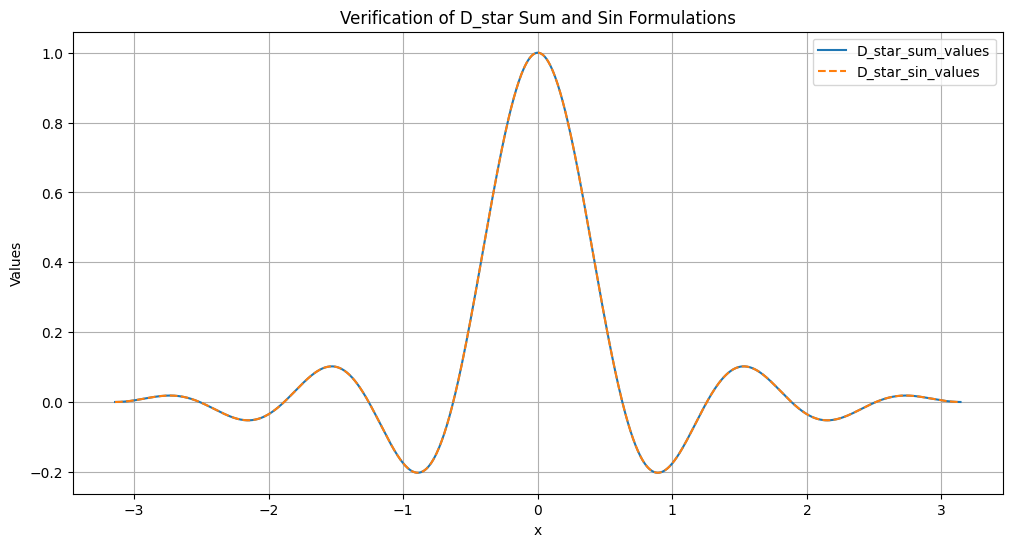

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def D_star_sum(x, R):
    terms = [1/(2*R), 1/(2*R) * np.cos(R * x)] + [1/R * np.cos(l * x) for l in range(1, R)]
    return sum(terms)

def D_star_sin(x, R):
    return np.sin(R * x) / (2 * R * np.tan(x / 2))

# Parameters
R = 5
x = np.linspace(-np.pi, np.pi, 1000)

# Calculate values
D_star_sum_values = D_star_sum(x, R)
D_star_sin_values = D_star_sin(x, R)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, D_star_sum_values, label='D_star_sum_values', linestyle='-', marker='')
plt.plot(x, D_star_sin_values, label='D_star_sin_values', linestyle='--', marker='')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Verification of D_star Sum and Sin Formulations')
plt.legend()
plt.grid(True)
plt.show()


This kernel satisfies the relations
$$
D^*\left(x_{\mu^{\prime}}-x_\mu\right)=\delta_{\mu \mu^{\prime}}, \quad D^*\left(x_{\mu^{\prime}}+x_\mu\right)=0,
$$

In [2]:
# Parameters
R = 5
mus = np.arange(1, R + 1)
x_mus = (2 * mus - 1) / (2 * R) * np.pi

# Calculate D^*(x_{mu'} - x_{mu}) and D^*(x_{mu'} + x_{mu})
D_diff = np.zeros((R, R))
D_sum = np.zeros((R, R))

for mu in range(R):
    for mu_prime in range(R):
        x_mu = x_mus[mu]
        x_mu_prime = x_mus[mu_prime]
        D_diff[mu, mu_prime] = D_star_sum(x_mu_prime - x_mu, R)
        D_sum[mu, mu_prime] = D_star_sum(x_mu_prime + x_mu, R)

# Expected results
expected_D_diff = np.eye(R)
expected_D_sum = np.zeros((R, R))

# Check if the relations hold
diff_relation_holds = np.allclose(D_diff, expected_D_diff)
sum_relation_holds = np.allclose(D_sum, expected_D_sum)

diff_relation_holds, sum_relation_holds

(True, True)

but unfortunately, $D^*(x)$ is a linear combination of cosines, not sines; it's an even function, not an odd function. We therefore instead consider the linear combinations
$$
\begin{aligned}
\tilde{D}_\mu(x) & :=D^*\left(x-x_\mu\right)-D^*\left(x+x_\mu\right) \\
& =\frac{\sin \left(R\left(x-x_\mu\right)\right)}{2 R \tan \left(\frac{1}{2}\left(x-x_\mu\right)\right)}-\frac{\sin \left(R\left(x+x_\mu\right)\right)}{2 R \tan \left(\frac{1}{2}\left(x+x_\mu\right)\right)} \\
& =\frac{1}{R} \cos \left(x_\mu\right)\left[\frac{1}{2} \sin (R x)+\sum_{\ell=1}^{R-1} \sin (\ell x)\right] .
\end{aligned}
$$

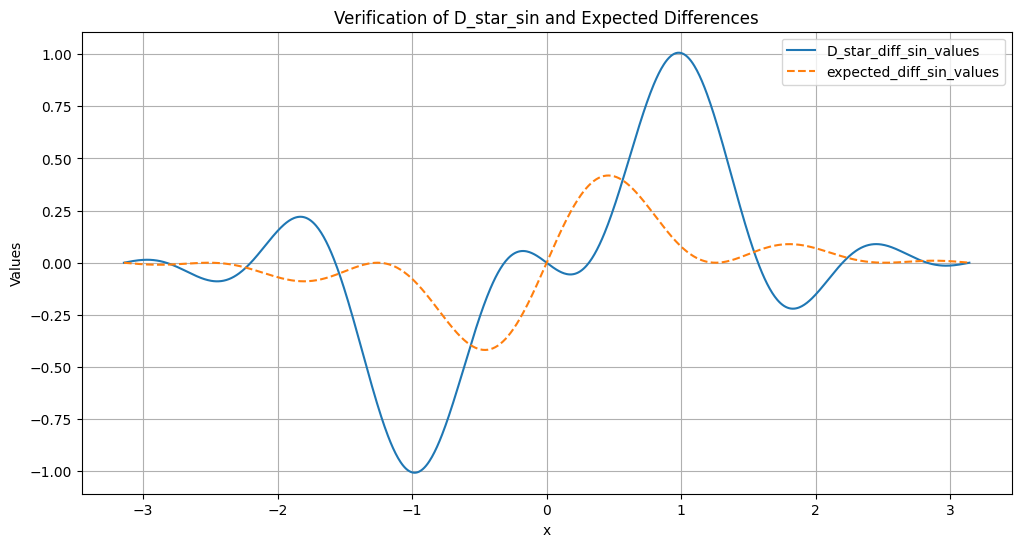

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def D_star_sin(x, R):
    return np.sin(R * x) / (2 * R * np.tan(x / 2))

def tilde_D_mu_sin(x, x_mu, R):
    D_star_diff = D_star_sin(x - x_mu, R) - D_star_sin(x + x_mu, R)
    expected_diff = (1/R) * np.cos(x_mu) * (0.5 * np.sin(R * x) + sum(np.sin(l * x) for l in range(1, R)))
    return D_star_diff, expected_diff

# Parameters
R = 5
x = np.linspace(-np.pi, np.pi, 1000)
mu = 2
x_mu = (2 * mu - 1) / (2 * R) * np.pi

# Calculate the differences
D_star_diff_sin_values, expected_diff_sin_values = tilde_D_mu_sin(x, x_mu, R)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(x, D_star_diff_sin_values, label='D_star_diff_sin_values', linestyle='-', marker='')
plt.plot(x, expected_diff_sin_values, label='expected_diff_sin_values', linestyle='--', marker='')
plt.xlabel('x')
plt.ylabel('Values')
plt.title('Verification of D_star_sin and Expected Differences')
plt.legend()
plt.grid(True)
plt.show()


验证 $\tilde{D}_\mu^{\prime}(0)$ 是否等于 $\frac{\sin \left(R x_\mu\right)}{2 R \sin ^2\left(\frac{1}{2} x_\mu\right)}$ 

In [4]:
import numpy as np

def D_star_sin(x, R):
    return np.sin(R * x) / (2 * R * np.tan(x / 2))

def tilde_D_mu_sin(x, x_mu, R):
    D_star_diff = D_star_sin(x - x_mu, R) - D_star_sin(x + x_mu, R)
    return D_star_diff

def numerical_derivative(func, x, h=1e-6):
    return (func(x + h) - func(x - h)) / (2 * h)

# Parameters
R = 5
mu = 3
for mu in range(1,R+1):
    x = 0  # We are interested in the derivative at x = 0
    x_mu = (2 * mu - 1) / (2 * R) * np.pi

    # Define the function to be differentiated
    func = lambda x: tilde_D_mu_sin(x, x_mu, R)

    # Calculate the numerical derivative at x = 0
    D_star_diff_prime_value = numerical_derivative(func, x)

    # Expected value
    expected_prime_value = np.sin(R * x_mu) / (2 * R * np.sin(x_mu / 2)**2)

    print(f"mu = {mu}")
    print(D_star_diff_prime_value)
    print(expected_prime_value)


mu = 1
4.086345818832271
4.086345818906141
mu = 2
-0.4851839996711238
-0.48518399963191833
mu = 3
0.19999999999187335
0.19999999999999996
mu = 4
-0.12596161838573927
-0.12596161836824998
mu = 5
0.1025085631066458
0.10250856309369166
